OSE scentific computation final report  WS 2020/2021 Bonn University
Title
author: Po-Tse Cheng

In [1]:
import numpy as np 
import pandas as pd
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt
import os 

from tools.auxiliary import*
from tools.GSSA_1_agent import*
from tools.GSSA_countries import*

In [7]:
# todo 
#- recomment the comments
# make all functions only rely on data inside data

What you can expect in this notebook:

- All of the matlab codes from the original authors have been translated into python, including Appendix.
- Besides of the representitive agent model, a multicountry model purposed by the paper is also implemented in python.

What is the caveat:

- The time in general will not match, as python in general is slower than matlab.
- Accuracy will also differs, but in general will not affect our conclusion.
- Two proximation methods included in GSSA, namely LAD-DP and RLAD-DP is not implemented



This notebook contains the python implementation of the General Stochastic Simulation Algorithm (GSSA), developed by Kenneth L. Judde et. al (2011). 

## Introduction

There are three mainstream methods for solving a dynamic stochastic economics model: projection methods, perturbation methods, and stochastic simulation methods. Each of these methods have 

We will be focusing on the stochastic model with the goal of 

-----
Work in process: Maybe it make sense to first talk about the GSSA then look at the stuff of stability and accuracy
This notebook is constructed as the following: We will first look at the theorethical background for stochastic model, including potential solution of addressing the undesired properties. Then we will take a closer look at GSSA's mechanisms. In chapter 4, we will showcase the GSSA in a multi-country framework. Lastly, we conclude this notebook in chapter 5.

## Background

### The Representitive Agent Model

Consider an agent that faces intertemporal utility-maximisation problem:

\begin{align*}

\max_{\{k_{t+1}, c_{t}\}_{t=0,...,\infty}}&E_{0}\sum^{\infty}_{t=0}\beta^{t}u(c_{t}) \tag{1} \\

s.t.\quad &c_{t}+k_{t+1}=(1-\delta)k_{t}+a_{t}f(k_{t}), \tag{2}\\
&\ln a_{t+1}=\rho\ln a_{t}+\epsilon_{t+1}, \epsilon_{t+1}\sim \mathcal{N}(0,\,\sigma^{2}) \tag{3}\\
&u^{'}(c_{t})=E_{t}\{\beta u^{'}(c_{t+1})[1-\delta+a_{t+1}f^{'}(k_{t+1})]\} \tag{4}
\end{align*}

  Where $u(\boldsymbol{\cdot})$ represents the utility function, $E_{t}$ on the other hand denotes the expectation operator for the information given at time $t$.  $c_{t}$, $k_{t}$, $a_{t}$ stands for consumption, capital, and productivity level respectively. $f(\boldsymbol{\cdot})$ describes the production function. $\beta \in (0,1)$ denotes the discount factor; while $\delta \in (0,1]$ and $\rho \in (-1,1)$ represents depreciation of capital and autocorrelation coefficient of the productivity level. $\sigma \geq 0$ stands for the standard deviation of the productivity shock. Notice that during $t=0$ both $k_{0}$ and $a_{0}$ are given. The solution to the stochastic model needs to satisfy the Euler equation (4), while also both transition equations (2) (3). Our objective will be trying to obtain both policy and consumption function, which denotes as $K(\boldsymbol{\cdot})$, $C(\boldsymbol{\cdot})$. Both solutions also need to be able to represent as a Markov equilibrium such that $k_{t+1}= K(k_{t},a_{t})$ and $c_{t}=C(k_{t}, a_{t})$.

  So how do we solve this problem? We will be using 2 particular tools to obtain our solutions. Firstly, we will incorporate the flexible functional form $\psi(\boldsymbol{\cdot} ;b)$ to approximate the original policy function $K(\boldsymbol{\cdot})$. Here $b$ denotes the vector of coefficients that we wish to obtain. $K(\boldsymbol{\cdot})$ is therefore expressed with:

\begin{align*}
\psi(k_{t}, a_{t}; b) \approx K(k_{t},a_{t})=k_{t+1} \tag{5}
\end{align*}

Where as $\psi$ can have multiple forms. Now consider the second tool: Fixed point construction. We can do so by rewriting equation (4) as follow:

\begin{align*}
&u^{'}(c_{t})=E_{t}\{\beta u^{'}(c_{t+1})[1-\delta+a_{t+1}f^{'}(k_{t+1})]\} \\
&\equiv  1=E_{t}\{\beta\frac{u^{'}(c_{t+1})}{u^{'}(c_{t})} [1-\delta+a_{t+1}f^{'}(k_{t+1})]\} \\
&\equiv k_{t+1}= E_{t}\{\beta\frac{u^{'}(c_{t+1})}{u^{'}(c_{t})} [1-\delta+a_{t+1}f^{'}(k_{t+1})]k_{t+1}\} \tag{6}
\end{align*}

  Given that the first derivative of utility function $u^{'}(c_{t})$ in the Euler equation can never be 0, equation (6) holds under any condition. By combining both equation (5) and equation (6) (by subtitution), we will be able to solve the stochastic model by computing the conditional expectation.

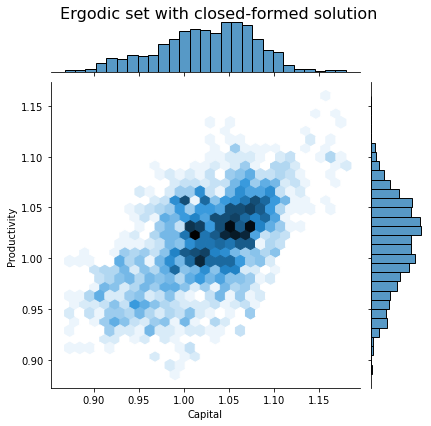

In [2]:
Figure1()

### PEA from Marcelt et al. (1988)

Marcelt et al. (1988) designs a Parameterized Expectations Algorithm (PEA) algorithm to tackle with the 1 agent problem. However, Maliar et al. (2003) highlights a flaw for PEA, namely the algorithm does not gurantee a solution. The authors further show that such problem can be remove by introducing boundaries. Despite the inaccurate initial guess, the solution will gradually improve as the algorithm will update the solution in the given framework. GSSA 
GSSA overcome such problem by introducing bound
The GSSA is an expansion of PEA, which 

GSSA is an expansion to the Parameterized Expectations Algorithm (PEA) developed by . The procedures of the PEA are as the following:

1. 



A key difference between Judd et.al (2011) and Marcelt et. al (1988) is that instead of incorporating the original exponential $\psi$:

\begin{align*}
\psi(k_{t}, a_{t}; b)= \exp (b_{0}+ b_{1} \ln a_{t}+,...,b_{n} \ln (a_{t})^{l}) 
\end{align*}

  They change the flexible functional form to the following:

\begin{align*}
\psi(k_{t}, a_{t}; b)=  b_{0}+ b_{1} \ln a_{t}+,...,b_{n} \ln (a_{t})^{l}
\end{align*}

  The motivation behind this attempt is to further reduce the complexity of obtaining $b$ by allow linear regression methods instead of non-linear ones. Therefore 

In particular, GSSA 

## Weakness Identifying and Solving

### Problem with stochastic methods

A stochastic algorithm has the ususal procedures for model solving:
<ol>
 <li>Guessing the policy or value function</li>
 <li>Simulate the time series solution</li>
 <li>Use simulated solution to recompute the guess</li>
 <li>Repeat until converge</li>
</ol>
Notice that during 

### Ill-conditioned LS problems

#### Scaling

Under a 


Scaling:




#### Multicollinearity

### Stability enhancement:

#### LS approach

#### LAD approach

#### Other factors (Polynomial types):

In [9]:
result1, result2, result3 = Result_agent(cache=True)

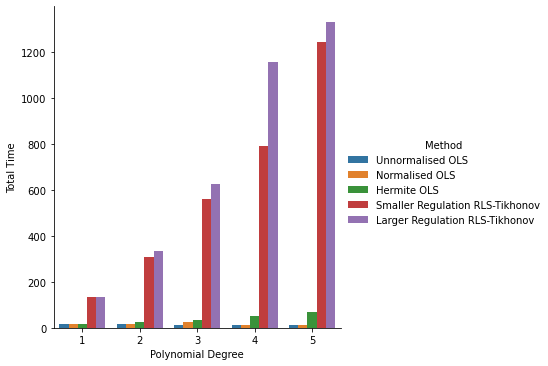

In [10]:
sns.factorplot(x='Polynomial Degree', y='Total Time', hue='Method', data=result1, kind='bar')

In [ ]:
# more plots here

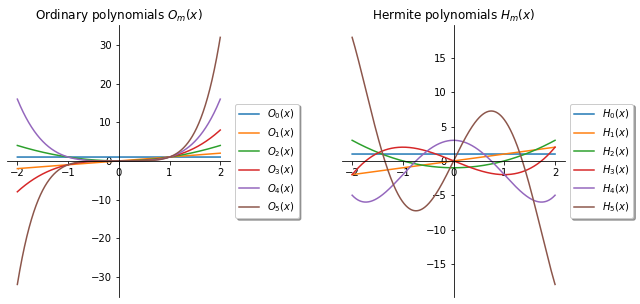

In [3]:
Figure2()

### Accuracy integration

## Generalised simulation stochastic algorithm

### GSSA codes and structure:

GSSA is broken into mainly 2 parts: Stage 1 and Stage 2. The purpose of Stage 1 aims to find suitable candidates via iterating over our fixed point equation (6). Stage 2 conducts the accuracy test by using a new set of test points (can be another set of random draw or deterministic set of points) independent to the solution. The following procedure is a synopnis of each stage:

#### GSSA Stage 1

1. Initialisation

* Parameters set up 
* Initial states for $k_{0}$ and $a_{0}$
* Define simulation length, simulate 

2. At iteration $p$ Use $b^{(p)}$ to simulate the model for $T$ periods
* Capital
\begin{align*}
k_{t+1}=\psi(k_{t},a_{t};b^{(p)})
\end{align*}


* Consumption
\begin{align*}
c_{t}=(1-\delta)k_{t}+ a_{t,j}f(k_{t})-k_{t+1,j}
\end{align*}


3. Define $y_{t}$ to be the approximation of conditional expectation in equation (6) with given $J$ integration nodes $\{\epsilon_{t+1,j}\}_{j=1,...,J}$ and weights $\{\omega_{t+1,j}\}_{j=1,...,J}$ discussed in previous section:

\begin{align*}
y_{t}= \sum^{J}_{j=1}\{\omega_{t,j}\cdot(\beta\frac{u^{'}(c_{t+1,j})}{u^{'}(c_{t})}[1-\delta + a_{t+1,j}f^{'}(k_{t+1}) ]k_{t+1}) \} \tag{7} 
\end{align*}



Notice that $a_{t+1,j}$, $k_{t+2,j}$, and $c_{t+1,j}$ are calculated as following:
\begin{align*}
a_{t+1,j} = a^{\rho}_{t}exp(\epsilon_{t+1,j})
\end{align*}


\begin{align*}
k_{t+2,j} \equiv& \psi(k_{t+1}, a^{\rho}_{t}exp(\epsilon_{t+1,j});b^{(p)} ) \\
\end{align*}


\begin{align*}
c_{t+1,j} = (1-\delta)k_{t+1}+ a_{t+1,j}f(k_{t+1})-k_{t+2,j}
\end{align*}


4. Find the $\hat b$ that minimise the error term with chosen approximation method, depending on whether if it is the initial guess or updating the solution

5. Check convergence, jump out of stage one if satisfied
\begin{align*}
\frac{1}{T}\sum^{T}_{t=1}|\frac{k^{(p)}_{t+1}-k^{p-1}_{t+1}}{k^{(p)}_{t+1}}| < \varphi
\end{align*}


Where the D inside the code denotes the polynomial degree and kdamp stands for damping parameter for iteration on the coefficients of the capital policy functions. The convergence parameter $\varphi$ depends on both values.

6. Compute $b^{p+1}$ for the next iteration
\begin{align*}
b^{(p+1)}=(1-\xi)b^{(p)} + \xi \hat b \tag{8} 
\end{align*}

<div class="alert alert-block alert-success">
<b>Side note:</b> Notice that within Stage 1, GSSA will first employ a 1-node Monte Carol intergration method for the initial guessing. Then, within the scope of Stage 1, GSSA will update the solution with regards to each polynomial based on the selected regression method, integration method, and polynomials.
</div>

#### GSSA stage 2

#### GSSA Result Showcase

Final result as below, which achieve great accuracy

In [4]:
showcase_result = GSSA_ShowcaseResult()

In [5]:
showcase_result

,Maximum Error,Mean Error,Time,Error Time,Polynomial Degree,Total Time,Rounded Total Time,Original Mean Error,Original Max Error
0,-3.366134,-4.358702,24.508506,0.691195,1,25.199701,25.20,4.378225e-05,4.303938e-04
1,-4.883611,-6.118154,43.872077,0.797906,2,44.669983,44.67,7.618090e-07,1.307343e-05
2,-5.951989,-7.481158,59.099998,0.820845,3,59.920843,59.92,3.302497e-08,1.116891e-06
3,-7.021109,-8.716910,92.274568,1.055215,4,93.329784,93.33,1.919067e-09,9.525574e-08
4,-7.178640,-8.893005,127.536306,1.057169,5,128.593475,128.59,1.279368e-09,6.627663e-08


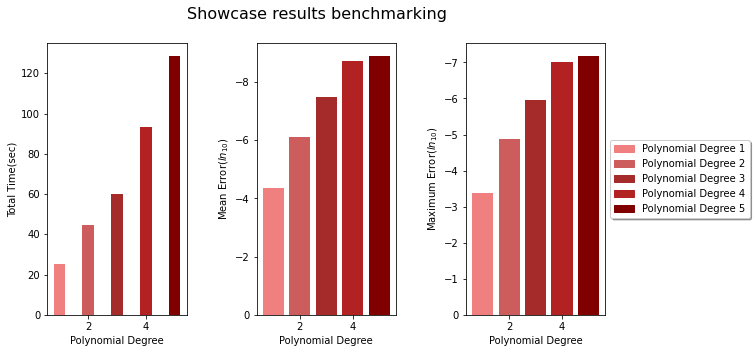

In [6]:
Figure3(showcase_result)

### Benchmarking results

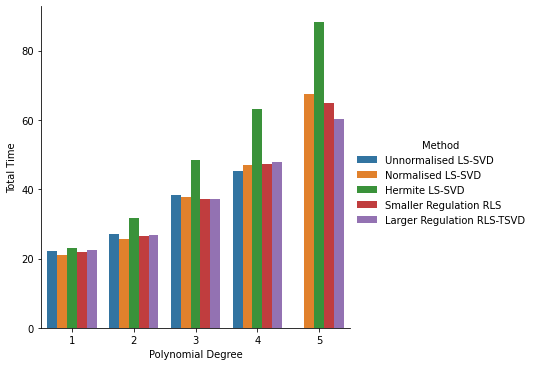

In [7]:
sns.factorplot(x='Polynomial Degree', y='Total Time', hue='Method', data=result2, kind='bar')

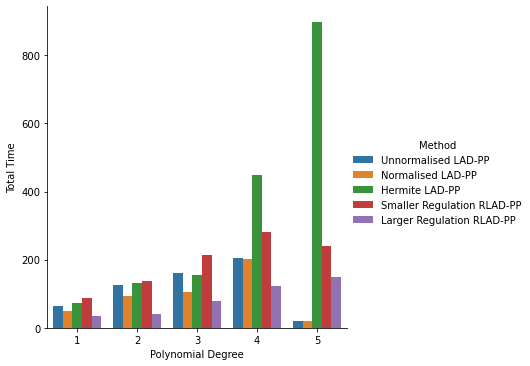

In [8]:
sns.factorplot(x='Polynomial Degree', y='Total Time', hue='Method', data=result3, kind='bar')

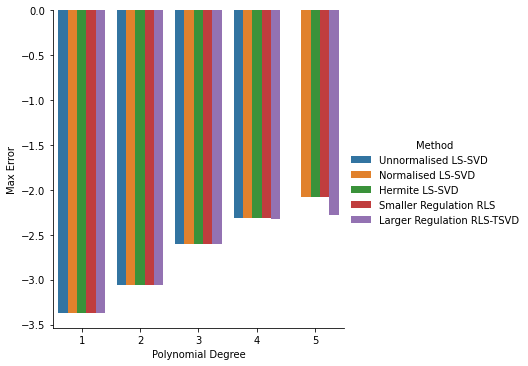

In [9]:
sns.factorplot(x='Polynomial Degree', y='Max Error', hue='Method', data=result2, kind='bar')

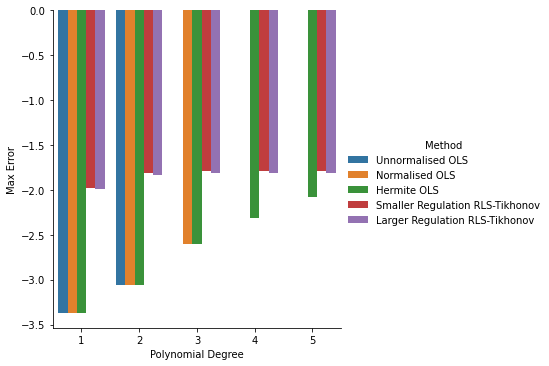

In [10]:
sns.factorplot(x='Polynomial Degree', y='Max Error', hue='Method', data=result1, kind='bar')

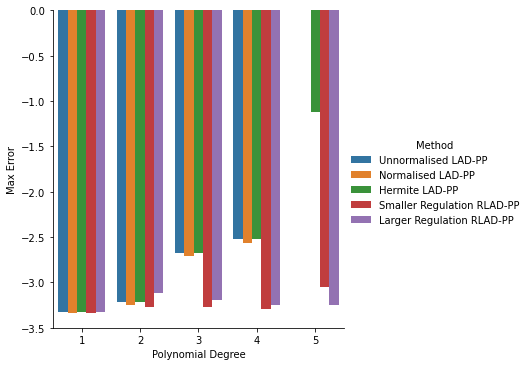

In [11]:
sns.factorplot(x='Polynomial Degree', y='Max Error', hue='Method', data=result3, kind='bar')

In [ ]:
#todo:
# finish caching country results
# finish monte-caro problem showcasing

In [3]:
countries_1 = GSSA_country_df(N=20, Cache=False)
# write a function that deals with high dimension eg(50, 100) countries
countries_1.to_csv("countries_20.csv",index=False, encoding='utf-8')
# checking purposes
lmao = pd.read_csv("countries_20.csv")

In [16]:
#Monta-Carol inaccuracy

 
max_table2_1 = []
mean_table2_1 = []
error_time_table2_1 = []
Time_table2_1 = []
stage1_time_tables2_1 =[]
for i in range(11):
    max_out, mean_out, error_time, Time_out, stage1_time = GSSA_1_agent(T=1000, T_test=10000, D_max=5, IM=0, RM=7 ,normalize=1, penalty=-7, PF=0)
    max_table2_1.append(max_out)
    mean_table2_1.append(mean_out)
    error_time_table2_1.append(error_time)
    Time_table2_1.append(Time_out)
    stage1_time_tables2_1.append(stage1_time)

max_table2_2 = []
mean_table2_2 = []
error_time_table2_2 = []
Time_table2_2 = []
stage1_time_tables2_2 =[]
for i in range(11):
    max_out, mean_out, error_time, Time_out, stage1_time = GSSA_1_agent(T=10000, T_test=10200, D_max=5, IM=0, RM=7 ,normalize=1, penalty=-7, PF=0)
    max_table2_2.append(max_out)
    mean_table2_2.append(mean_out)
    error_time_table2_2.append(error_time)
    Time_table2_2.append(Time_out)
    stage1_time_tables2_2.append(stage1_time)

### Country implementation

### Conclusion

### Reference

Maliar, L., & Maliar, S. (2003). Parameterized Expectations Algorithm and the Moving Bounds. Journal of Business & Economic Statistics, 21(1), 88-92.

Den Haan, W. J., & Marcet, A. (1990). Solving the stochastic growth model by parameterizing expectations. Journal of Business & Economic Statistics, 8(1), 31-34.

